In [14]:
import zipfile
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
zip_new= zipfile.ZipFile(r"C:\Users\aspir\Downloads\10_food_classes_all_data.zip")
zip_new.extractall()
zip_new.close()

In [17]:
for dirpath , dirnames,filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} classes and each classes have {len(filenames)} images in {dirpath}")

There are 2 classes and each classes have 0 images in 10_food_classes_all_data
There are 10 classes and each classes have 0 images in 10_food_classes_all_data\test
There are 0 classes and each classes have 250 images in 10_food_classes_all_data\test\chicken_curry
There are 0 classes and each classes have 250 images in 10_food_classes_all_data\test\chicken_wings
There are 0 classes and each classes have 250 images in 10_food_classes_all_data\test\fried_rice
There are 0 classes and each classes have 250 images in 10_food_classes_all_data\test\grilled_salmon
There are 0 classes and each classes have 250 images in 10_food_classes_all_data\test\hamburger
There are 0 classes and each classes have 250 images in 10_food_classes_all_data\test\ice_cream
There are 0 classes and each classes have 250 images in 10_food_classes_all_data\test\pizza
There are 0 classes and each classes have 250 images in 10_food_classes_all_data\test\ramen
There are 0 classes and each classes have 250 images in 10_foo

In [18]:
train_dir="10_food_classes_all_data/train"
test_dir="10_food_classes_all_data/test"

In [19]:
import pathlib
import numpy as np

In [20]:
data_dir=pathlib.Path(train_dir)
class_names= np.array(sorted([item.name for item in data_dir.glob('*')]))

In [21]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [53]:
target_image=os.path.join("10_food_classes_all_data/test/","ice_cream")
img=random.choice(os.listdir(target_image))
img_to= mpimg.imread(os.path.join(target_image,img))

(-0.5, 511.5, 286.5, -0.5)

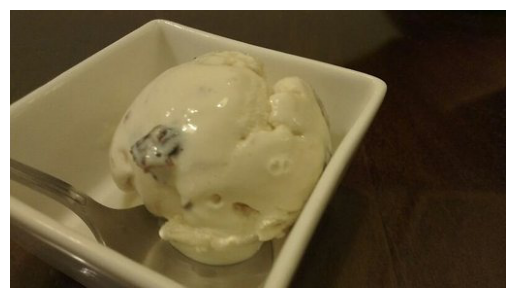

In [55]:
plt.imshow(img_to)
plt.axis("off")

In [26]:
clas = os.path.join("10_food_classes_all_data/", "test")
classes = os.listdir(clas)


chicken_curry


In [5]:
import tensorflow as tf

In [6]:
img_to.shape

NameError: name 'img_to' is not defined

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

train_datagen=ImageDataGenerator(rescale=1./255,height_shift_range=0.3,width_shift_range=0.2,zoom_range=0.3,shear_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255,height_shift_range=0.3,width_shift_range=0.2,zoom_range=0.3,shear_range=0.2)

train_data_agumented= train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=18,
                                             target_size=(227,227),
                                             class_mode="categorical",
                                             seed=42)
valid_data_agumented= test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=18,
                                             target_size=(227,227),
                                             class_mode="categorical",
                                             seed=42)


train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=18,
                                             target_size=(227,227),
                                             class_mode="categorical",
                                             seed=42)
valid_data= test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=18,
                                             target_size=(227,227),
                                             class_mode="categorical",
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [21]:
images,labels= train_data.next()
images_agumented, labels_agumented= train_data_agumented.next()
import random
i= random.randint(0,18)

Non Agumented


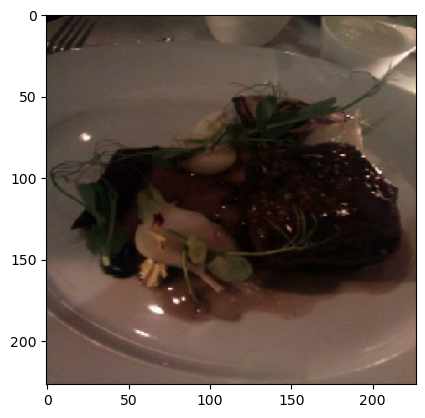

Agumented


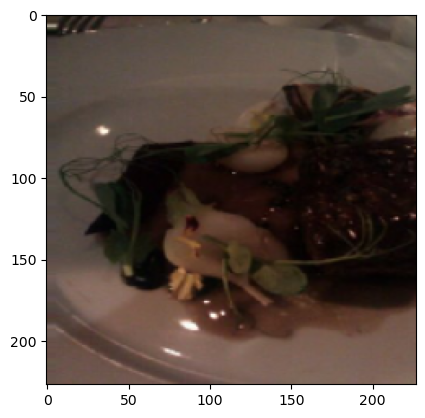

In [22]:
print("Non Agumented")
plt.imshow(images[i])
plt.show()
print("Agumented")
plt.imshow(images_agumented[i])
plt.show()

In [1]:
from tensorflow.keras  import Sequential
from tensorflow.keras  import layers

In [24]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(15, 9, strides=1, padding='valid', activation='relu', input_shape=(227, 227, 3)),
    layers.MaxPool2D(pool_size=(3, 3), strides=3),
    layers.Conv2D(68, 3, strides=1, activation='relu'),
    layers.MaxPool2D(pool_size=(3, 3), strides=2),
    layers.Conv2D(108, 2, strides=1, padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(3, 3), strides=2),
    layers.Flatten(),
    layers.Dense(216, activation='relu'),
    layers.Dense(192,activation='relu'),
    layers.Dense(10, activation='softmax')
])



# Print the model summary to verify the architecture
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 219, 219, 15)      3660      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 73, 73, 15)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 68)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 35, 35, 68)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 108)       29484     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 108)      

In [81]:
model.compile( loss=tf.keras.losses.categorical_crossentropy,
             optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])
lr_scheduler= tf.keras.callbacks.EarlyStopping(  monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,)

In [ ]:
history=model.fit(train_data_agumented,
         epochs=10,
         steps_per_epoch=len(train_data_agumented),
         validation_data=valid_data_agumented,
         validation_steps=len(valid_data_agumented)
                 callba)


Epoch 1/10
417/417 [==============================] - 298s 711ms/step - loss: 1.8432 - accuracy: 0.3611 - val_loss: 1.8512 - val_accuracy: 0.3712
Epoch 2/10
417/417 [==============================] - 293s 703ms/step - loss: 1.8173 - accuracy: 0.3704 - val_loss: 1.7974 - val_accuracy: 0.3664
Epoch 3/10
417/417 [==============================] - 293s 703ms/step - loss: 1.8028 - accuracy: 0.3732 - val_loss: 1.7447 - val_accuracy: 0.4068
Epoch 4/10
417/417 [==============================] - 293s 704ms/step - loss: 1.7708 - accuracy: 0.3909 - val_loss: 1.7289 - val_accuracy: 0.4084
Epoch 5/10
417/417 [==============================] - ETA: 0s - loss: 1.7721 - accuracy: 0.3835

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

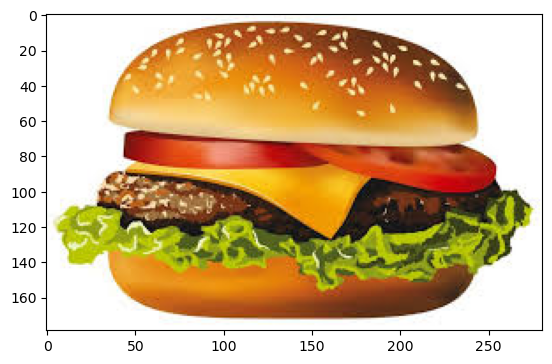

In [8]:
img=tf.keras.preprocessing.image.load_img("ham.jpeg")
image=tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(image.astype(int))
image

In [31]:
model.evaluate(train_data)

417/417 [==============================] - 36s 87ms/step - loss: 1.7921 - accuracy: 0.3885


[1.7920912504196167, 0.3885333240032196]

In [10]:
def preprocess(img , target_shape):
    reshaped_image=tf.image.resize(img,target_shape)
    new_img=reshaped_image/255.
    
    return new_img

In [11]:
buger=preprocess(image,(227,227))
buger.shape

TensorShape([227, 227, 3])

In [39]:
buger=tf.expand_dims(ice,0)

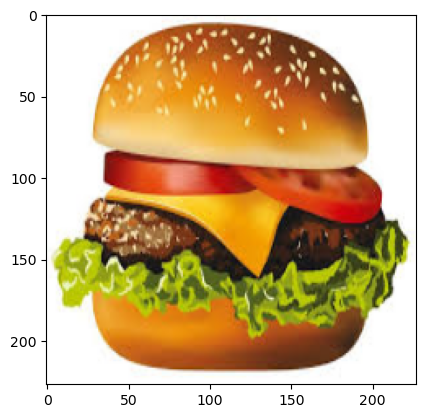

In [13]:
plt.imshow(buger)

In [58]:
def predict(image):
    pred=model.predict(image)
    print(f"prediction is:{class_names[tf.argmax(pred[0])]}")
    plt.imshow(tf.squeeze(image,0))

In [59]:
pred=model.predict(buger)
pred[0]

1/1 [==============================] - 0s 46ms/step


array([0.02743008, 0.00312766, 0.00214402, 0.30416605, 0.40118438,
       0.012828  , 0.02492095, 0.02046049, 0.00795297, 0.19578539],
      dtype=float32)

1/1 [==============================] - 0s 50ms/step
prediction is:hamburger


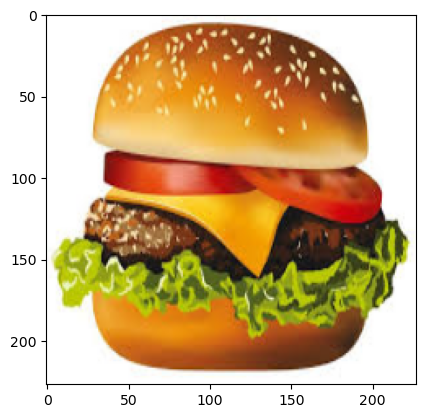

In [60]:
predict(buger)

In [64]:
import pandas as pd
new_df= pd.DataFrame(history.history)

In [65]:
new_df

,loss,accuracy,val_loss,val_accuracy
0,2.019436,0.274667,1.978513,0.2992
1,1.962196,0.309600,1.883059,0.3400
2,1.938218,0.322667,1.865148,0.3428
3,1.916281,0.329867,1.849860,0.3576
4,1.882487,0.341467,1.847742,0.3560
